In [1]:
import pandas as pd
import random

# Load the dataset
file_path = 'q12.csv'
data = pd.read_csv(file_path)

# Randomly select 50,000 rows from the dataset
subset_data = data.sample(n=50000, random_state=42)

# Basic Text Normalization function
def normalize_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = text.replace('?', '').replace('!', '').replace('.', '').replace(',', '')
    # Remove digits
    text = ''.join([char for char in text if not char.isdigit()])
    return text

# Apply normalization to the 'Sentence' column
subset_data['Sentence'] = subset_data['Sentence'].apply(normalize_text)

# Display the first 5 rows after normalization
print(subset_data.head())


                                                 Sentence Sentiment Emotion
134251  જો પ્રતિકાર હિંસક થવું હિંસક છે તો પ્રતિશોધ ક્...  Negative   Anger
124137  જો સાચાઈ વિજય મેળવવો સંતુલન ધરાવનાર છે તો મુખર...   Neutral   Peace
62810   મારું અંતરંગતા હ્રદયવિહિન છે અને તે હંમેશા પ્ર...  Positive    Love
65425   મારું ઉલ્લાસ અનુરાગી છે અને તે હંમેશા લાગણીઓમા...  Positive    Love
30074   ખુશાલી એ મારી ખુશી એ મધમાખીની જેમ હંમેશા મીઠાશ...  Positive     Joy


In [2]:
# Define a list of 5 custom Gujarati stopwords
gujarati_stopwords = ['અને', 'હંમેશા', 'તમે', 'છે', 'કે']

# Function to remove stopwords
def remove_stopwords(text, stopwords):
    return ' '.join([word for word in text.split() if word not in stopwords])

# Apply stopword removal
subset_data['Sentence'] = subset_data['Sentence'].apply(lambda x: remove_stopwords(x, gujarati_stopwords))

# Display the first 5 rows after stopword removal
print(subset_data.head())


                                                 Sentence Sentiment Emotion
134251  જો પ્રતિકાર હિંસક થવું હિંસક તો પ્રતિશોધ ક્રોધ...  Negative   Anger
124137  જો સાચાઈ વિજય મેળવવો સંતુલન ધરાવનાર તો મુખર વિ...   Neutral   Peace
62810   મારું અંતરંગતા હ્રદયવિહિન તે પ્રિયત્વ ઉભી કરવુ...  Positive    Love
65425   મારું ઉલ્લાસ અનુરાગી તે લાગણીઓમાં પ્રિયત્વ છેવ...  Positive    Love
30074   ખુશાલી એ મારી ખુશી એ મધમાખીની જેમ મીઠાશ લાવે સ...  Positive     Joy


In [3]:
# Filter sentences that are too short (less than 5 words)
subset_data = subset_data[subset_data['Sentence'].apply(lambda x: len(x.split()) >= 5)]

# Display the remaining dataset
print(subset_data.head())


                                                 Sentence Sentiment Emotion
134251  જો પ્રતિકાર હિંસક થવું હિંસક તો પ્રતિશોધ ક્રોધ...  Negative   Anger
124137  જો સાચાઈ વિજય મેળવવો સંતુલન ધરાવનાર તો મુખર વિ...   Neutral   Peace
62810   મારું અંતરંગતા હ્રદયવિહિન તે પ્રિયત્વ ઉભી કરવુ...  Positive    Love
65425   મારું ઉલ્લાસ અનુરાગી તે લાગણીઓમાં પ્રિયત્વ છેવ...  Positive    Love
30074   ખુશાલી એ મારી ખુશી એ મધમાખીની જેમ મીઠાશ લાવે સ...  Positive     Joy


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorizing the 'Sentence' column using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  # Limiting to 5000 features for efficiency
X = tfidf_vectorizer.fit_transform(subset_data['Sentence'])

# Encoding the labels for Sentiment and Emotion
y_sentiment = subset_data['Sentiment']
y_emotion = subset_data['Emotion']

# Splitting data into train and test sets (80% train, 20% test)
X_train, X_test, y_sentiment_train, y_sentiment_test, y_emotion_train, y_emotion_test = train_test_split(
    X, y_sentiment, y_emotion, test_size=0.2, random_state=42)

# Display the shapes of the training and test data
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")


Training data shape: (40000, 622)
Test data shape: (10000, 622)


Sentiment Accuracy: 0.9789
Sentiment Classification Report:
              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      3407
     Neutral       0.95      0.99      0.97      3296
    Positive       0.99      0.95      0.97      3297

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

Sentiment Confusion Matrix:
[[3400    6    1]
 [   8 3261   27]
 [   8  161 3128]]


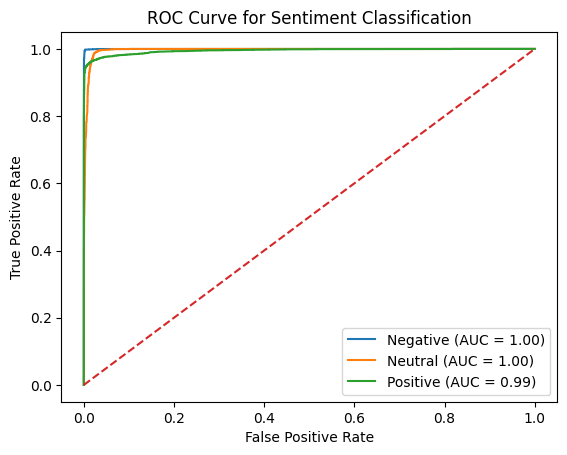

Emotion Accuracy: 0.8974
Emotion Classification Report:
              precision    recall  f1-score   support

  Acceptance       0.81      0.81      0.81      1121
       Anger       1.00      1.00      1.00      1205
        Calm       0.82      0.79      0.80      1068
       Grief       0.89      0.91      0.90      1107
        Hope       0.95      0.95      0.95      1099
         Joy       0.96      0.92      0.94      1091
        Love       0.97      0.98      0.98      1107
       Peace       0.75      0.80      0.77      1107
     Sadness       0.92      0.91      0.91      1095

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000

Emotion Confusion Matrix:
[[ 907    0   58   10   13   18    8  107    0]
 [   0 1204    0    0    0    0    1    0    0]
 [  48    0  846    0    8   13    1  152    0]
 [   0    0    0 1012    0    0    7    1   87]
 [  21    0   15    3

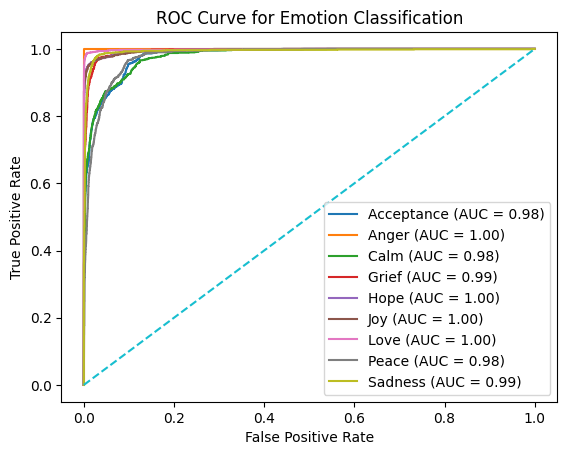

In [6]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the ROC curve for multiclass classification
def plot_multiclass_roc(y_true, y_scores, title, classes):
    # Binarize the labels for each class
    y_true_bin = label_binarize(y_true, classes=classes)

    # Plot ROC curve for each class
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_scores[:, i])
        auc = roc_auc_score(y_true_bin[:, i], y_scores[:, i])
        plt.plot(fpr, tpr, label=f'{classes[i]} (AUC = {auc:.2f})')

    plt.plot([0, 1], [0, 1], linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

# Train the SVM model for Sentiment classification using OneVsRest strategy
svm_sentiment = OneVsRestClassifier(SVC(probability=True, random_state=42))
svm_sentiment.fit(X_train, y_sentiment_train)

# Evaluate the model for sentiment classification
y_sentiment_pred = svm_sentiment.predict(X_test)
sentiment_accuracy = accuracy_score(y_sentiment_test, y_sentiment_pred)
print(f"Sentiment Accuracy: {sentiment_accuracy}")

# Confusion matrix and classification report for sentiment
print("Sentiment Classification Report:")
print(classification_report(y_sentiment_test, y_sentiment_pred))

print("Sentiment Confusion Matrix:")
print(confusion_matrix(y_sentiment_test, y_sentiment_pred))

# ROC and AUC for sentiment
y_sentiment_scores = svm_sentiment.decision_function(X_test)
sentiment_classes = svm_sentiment.classes_
plot_multiclass_roc(y_sentiment_test, y_sentiment_scores, "ROC Curve for Sentiment Classification", sentiment_classes)

# Train the SVM model for Emotion classification using OneVsRest strategy
svm_emotion = OneVsRestClassifier(SVC(probability=True, random_state=42))
svm_emotion.fit(X_train, y_emotion_train)

# Evaluate the model for emotion classification
y_emotion_pred = svm_emotion.predict(X_test)
emotion_accuracy = accuracy_score(y_emotion_test, y_emotion_pred)
print(f"Emotion Accuracy: {emotion_accuracy}")

# Confusion matrix and classification report for emotion
print("Emotion Classification Report:")
print(classification_report(y_emotion_test, y_emotion_pred))

print("Emotion Confusion Matrix:")
print(confusion_matrix(y_emotion_test, y_emotion_pred))

# ROC and AUC for emotion
y_emotion_scores = svm_emotion.decision_function(X_test)
emotion_classes = svm_emotion.classes_
plot_multiclass_roc(y_emotion_test, y_emotion_scores, "ROC Curve for Emotion Classification", emotion_classes)


In [12]:
# Custom Gujarati sentences and their English translations
custom_sentences_gujarati = [
    "મારા દુ:ખનો અંત નથી રડીને થાકી ગયો છું હવે તો મારી આંખોમાંથી આંસુ નથી",
    "મારું જીવન ખુશીથી ભરપૂર છે જેવું થાય છે તે આનંદનો રંગ",
    "મુશ્કેલ સમયમાં પણ આશાનો પ્રકાશ ઉંચા સપનાઓ તરફ લઈ જાય છે",
    "તારું નાજુક સ્પર્શ મને વિશ્વની બધાની તુલનામાં વધુ પ્રેમભર્યુ લાગે છે",
    "મારા ક્રોધની તીવ્રતા કહેવા મજબૂર કરે છે મને રોકવાનો પ્રયાસ કરશો નહીં"
]

# English translations
custom_sentences_english = [
    "Words fall short, breaths are stuck, oceans of tears have been swallowed.",
    "Smiling dreams color the sky, joy sparkles in life.",
    "In the shadow of darkness, rays of hope will fly fearlessly.",
    "In a gentle touch, the heartbeat of the world meets, a melting heart in love, a grain of the sky.",
    "Eyes are fire, words are sharp arrows, the storm of anger is cold breeze."
]

# Apply the same preprocessing to custom sentences
custom_sentences_preprocessed = [normalize_text(sentence) for sentence in custom_sentences_gujarati]
custom_sentences_preprocessed = [remove_stopwords(sentence, gujarati_stopwords) for sentence in custom_sentences_preprocessed]

# Vectorize the custom sentences
custom_sentences_tfidf = tfidf_vectorizer.transform(custom_sentences_preprocessed)

# Predict Sentiment and Emotion using the trained models
custom_sentiment_pred = svm_sentiment.predict(custom_sentences_tfidf)
custom_emotion_pred = svm_emotion.predict(custom_sentences_tfidf)

# Display the results with English translations
for i, sentence in enumerate(custom_sentences_gujarati):
    print(f"Gujarati Sentence: {sentence}")
    print(f"English Translation: {custom_sentences_english[i]}")
    print(f"Predicted Sentiment: {custom_sentiment_pred[i]}")
    print(f"Predicted Emotion: {custom_emotion_pred[i]}")
    print()


Gujarati Sentence: મારા દુ:ખનો અંત નથી રડીને થાકી ગયો છું હવે તો મારી આંખોમાંથી આંસુ નથી
English Translation: Words fall short, breaths are stuck, oceans of tears have been swallowed.
Predicted Sentiment: Negative
Predicted Emotion: Sadness

Gujarati Sentence: મારું જીવન ખુશીથી ભરપૂર છે જેવું થાય છે તે આનંદનો રંગ
English Translation: Smiling dreams color the sky, joy sparkles in life.
Predicted Sentiment: Positive
Predicted Emotion: Joy

Gujarati Sentence: મુશ્કેલ સમયમાં પણ આશાનો પ્રકાશ ઉંચા સપનાઓ તરફ લઈ જાય છે
English Translation: In the shadow of darkness, rays of hope will fly fearlessly.
Predicted Sentiment: Positive
Predicted Emotion: Hope

Gujarati Sentence: તારું નાજુક સ્પર્શ મને વિશ્વની બધાની તુલનામાં વધુ પ્રેમભર્યુ લાગે છે
English Translation: In a gentle touch, the heartbeat of the world meets, a melting heart in love, a grain of the sky.
Predicted Sentiment: Positive
Predicted Emotion: Joy

Gujarati Sentence: મારા ક્રોધની તીવ્રતા કહેવા મજબૂર કરે છે મને રોકવાનો પ્રયાસ કરશો નહ

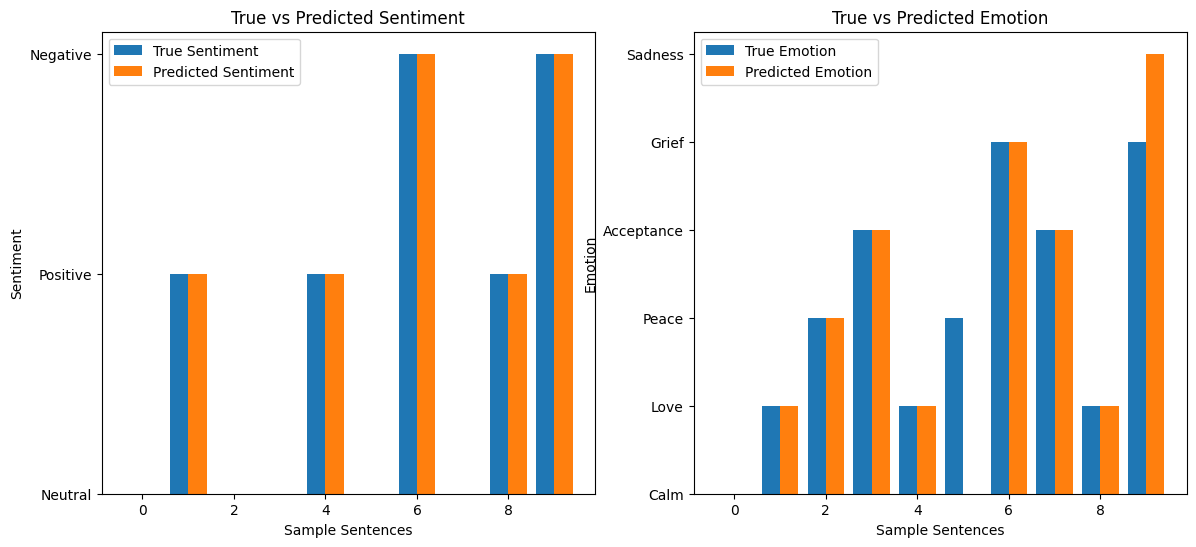

In [8]:
import numpy as np

# Take 10 random sentences from the test set
test_sample = subset_data.sample(10, random_state=42)
X_sample = tfidf_vectorizer.transform(test_sample['Sentence'])
y_sentiment_sample = test_sample['Sentiment']
y_emotion_sample = test_sample['Emotion']

# Predict sentiment and emotion for the sample
y_sentiment_pred_sample = svm_sentiment.predict(X_sample)
y_emotion_pred_sample = svm_emotion.predict(X_sample)

# Plotting the bar graph for sentiment and emotion
sentiments = np.arange(10)

plt.figure(figsize=(14, 6))

# Bar graph for Sentiment
plt.subplot(1, 2, 1)
plt.bar(sentiments - 0.2, y_sentiment_sample, 0.4, label='True Sentiment')
plt.bar(sentiments + 0.2, y_sentiment_pred_sample, 0.4, label='Predicted Sentiment')
plt.xlabel('Sample Sentences')
plt.ylabel('Sentiment')
plt.title('True vs Predicted Sentiment')
plt.legend()

# Bar graph for Emotion
plt.subplot(1, 2, 2)
plt.bar(sentiments - 0.2, y_emotion_sample, 0.4, label='True Emotion')
plt.bar(sentiments + 0.2, y_emotion_pred_sample, 0.4, label='Predicted Emotion')
plt.xlabel('Sample Sentences')
plt.ylabel('Emotion')
plt.title('True vs Predicted Emotion')
plt.legend()

plt.show()


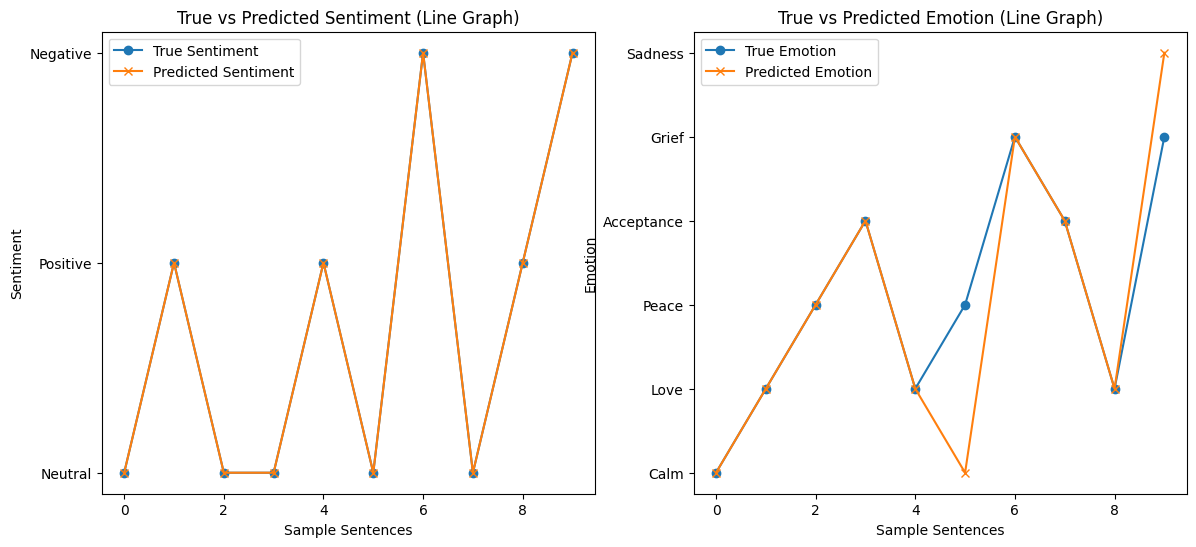

In [9]:
# Plotting the line graph for true vs predicted sentiment and emotion
plt.figure(figsize=(14, 6))

# Line graph for Sentiment
plt.subplot(1, 2, 1)
plt.plot(sentiments, y_sentiment_sample, label='True Sentiment', marker='o')
plt.plot(sentiments, y_sentiment_pred_sample, label='Predicted Sentiment', marker='x')
plt.xlabel('Sample Sentences')
plt.ylabel('Sentiment')
plt.title('True vs Predicted Sentiment (Line Graph)')
plt.legend()

# Line graph for Emotion
plt.subplot(1, 2, 2)
plt.plot(sentiments, y_emotion_sample, label='True Emotion', marker='o')
plt.plot(sentiments, y_emotion_pred_sample, label='Predicted Emotion', marker='x')
plt.xlabel('Sample Sentences')
plt.ylabel('Emotion')
plt.title('True vs Predicted Emotion (Line Graph)')
plt.legend()

plt.show()
